In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  
print ("packs loaded")
print ("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)

print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (mnist.train.num_examples))
print (" number of test data is %d" % (mnist.test.num_examples))

packs loaded
Download and Extract MNIST dataset
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.


Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


 tpye of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 number of trian data is 55000
 number of test data is 10000


In [2]:
# What does the data of MNIST look like? 
print ("What does the data of MNIST look like?")
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

What does the data of MNIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
 shape of 'testimg' is (10000, 784)
 shape of 'testlabel' is (10000, 10)


How does the training data look like?
39935th Training Data Label is 1
44020th Training Data Label is 3
51800th Training Data Label is 9
9422th Training Data Label is 2
43522th Training Data Label is 4


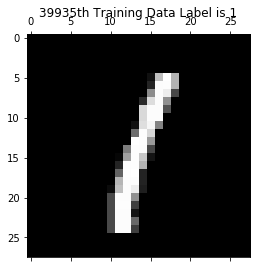

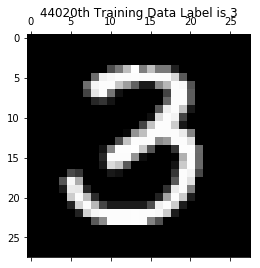

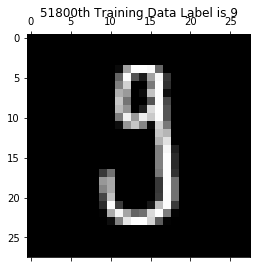

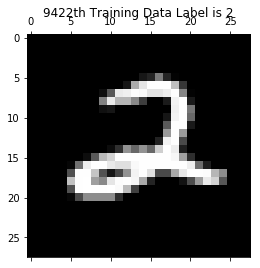

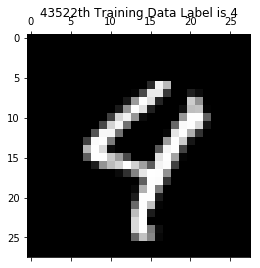

In [3]:
# How does the training data look like?
print ("How does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))

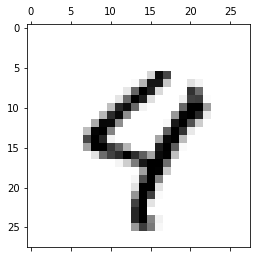

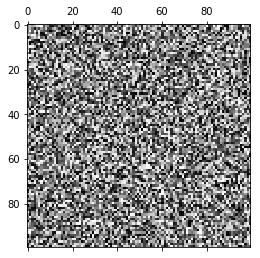

In [4]:
plt.matshow(curr_img, cmap=plt.get_cmap('gray_r'))
aa= np.random.rand(100,100)
plt.matshow(aa, cmap=plt.get_cmap('gray_r'))##plt.matshow()这是一个绘制矩阵的函数。原文：“plot a matrix or an array as an image"
#将矩阵转化为图片的样子展示

In [5]:
# Batch Learning? 
print ("Batch Learning? ")
batch_size = 100
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print ("type of 'batch_xs' is %s" % (type(batch_xs)))
print ("type of 'batch_ys' is %s" % (type(batch_ys)))
print ("shape of 'batch_xs' is %s" % (batch_xs.shape,))
print ("shape of 'batch_ys' is %s" % (batch_ys.shape,))

Batch Learning? 
type of 'batch_xs' is <class 'numpy.ndarray'>
type of 'batch_ys' is <class 'numpy.ndarray'>
shape of 'batch_xs' is (100, 784)
shape of 'batch_ys' is (100, 10)


In [6]:
# Get Random Batch with 'np.random.randint'
print ("5. Get Random Batch with 'np.random.randint'")
randidx   = np.random.randint(trainimg.shape[0], size=batch_size)
batch_xs2 = trainimg[randidx, :]
batch_ys2 = trainlabel[randidx, :]
print ("type of 'batch_xs2' is %s" % (type(batch_xs2)))
print ("type of 'batch_ys2' is %s" % (type(batch_ys2)))
print ("shape of 'batch_xs2' is %s" % (batch_xs2.shape,))
print ("shape of 'batch_ys2' is %s" % (batch_ys2.shape,))

5. Get Random Batch with 'np.random.randint'
type of 'batch_xs2' is <class 'numpy.ndarray'>
type of 'batch_ys2' is <class 'numpy.ndarray'>
shape of 'batch_xs2' is (100, 784)
shape of 'batch_ys2' is (100, 10)


In [7]:
randidx

array([  965, 17962, 19789, 53700, 42699, 35577, 48727, 25456, 52357,
        2932,  5362, 49317, 28641, 43533,  8819, 32399, 54394, 17306,
       47929,  3336, 49460, 51329, 31916,  5536, 11124, 13788, 18059,
       22788, 32153, 41873, 46423, 25903,  4660, 13742, 15974,  6846,
       19196, 46938, 39069, 41525, 35844, 34837, 43270, 43225, 34211,
       28927, 53146, 18175, 38377, 41469, 15520, 34522,  1093, 15046,
       36630, 28562, 51787, 17198, 27601,   736, 17716, 25599,  6220,
       37614, 35368, 35426, 48438,  6416, 49902, 15875, 34627, 43741,
        6619, 53394, 14244, 38163, 36580,  9733, 32793,  4776,  2392,
       33397, 16615,  4701,   554,  3937, 24713, 43915, 11292, 29295,
       54757, 49306,   131, 24217, 41641, 26824, 36173,  1339, 32158,
       26519])